# Project 2: Ames Housing Data Analysis

## EDA and Cleaning

In [1045]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

**Data used for analysis:**

In [5]:
df = pd.read_csv('../datasets/train.csv')

In [1146]:
%store df

Stored 'df' (DataFrame)


In [4]:
df_test = pd.read_csv("../datasets/test.csv")

In [1145]:
%store df_test

Stored 'df_test' (DataFrame)


In [6]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


**Exploring the data:**
- Data Types
- Null Values
- Summary Statistics
- Correlation Matrix

**Data Types:**

In [7]:
df.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [8]:
dtypes_count = df.dtypes.value_counts()
dtypes_count

object     42
int64      28
float64    11
dtype: int64

In [9]:
#look at numerical and categorical variables separately

df_numerical = df.select_dtypes(include = [np.number])
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [10]:
df_categorical = df.select_dtypes(include = [object])
df_categorical.describe().T

,count,unique,top,freq
MS Zoning,2051,7,RL,1598
Street,2051,2,Pave,2044
Alley,140,2,Grvl,85
Lot Shape,2051,4,Reg,1295
Land Contour,2051,4,Lvl,1843
Utilities,2051,3,AllPub,2049
Lot Config,2051,5,Inside,1503
Land Slope,2051,3,Gtl,1953
Neighborhood,2051,28,NAmes,310
Condition 1,2051,9,Norm,1767


**Note:** Some variables have fewer data counts than row count in the dataframe (2051).

**Null Values:**

In [11]:
df.shape

(2051, 81)

In [12]:
df_nulls = df.isnull().sum()
print(df_nulls[df_nulls > 0])

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64


**Correlation Matrix**

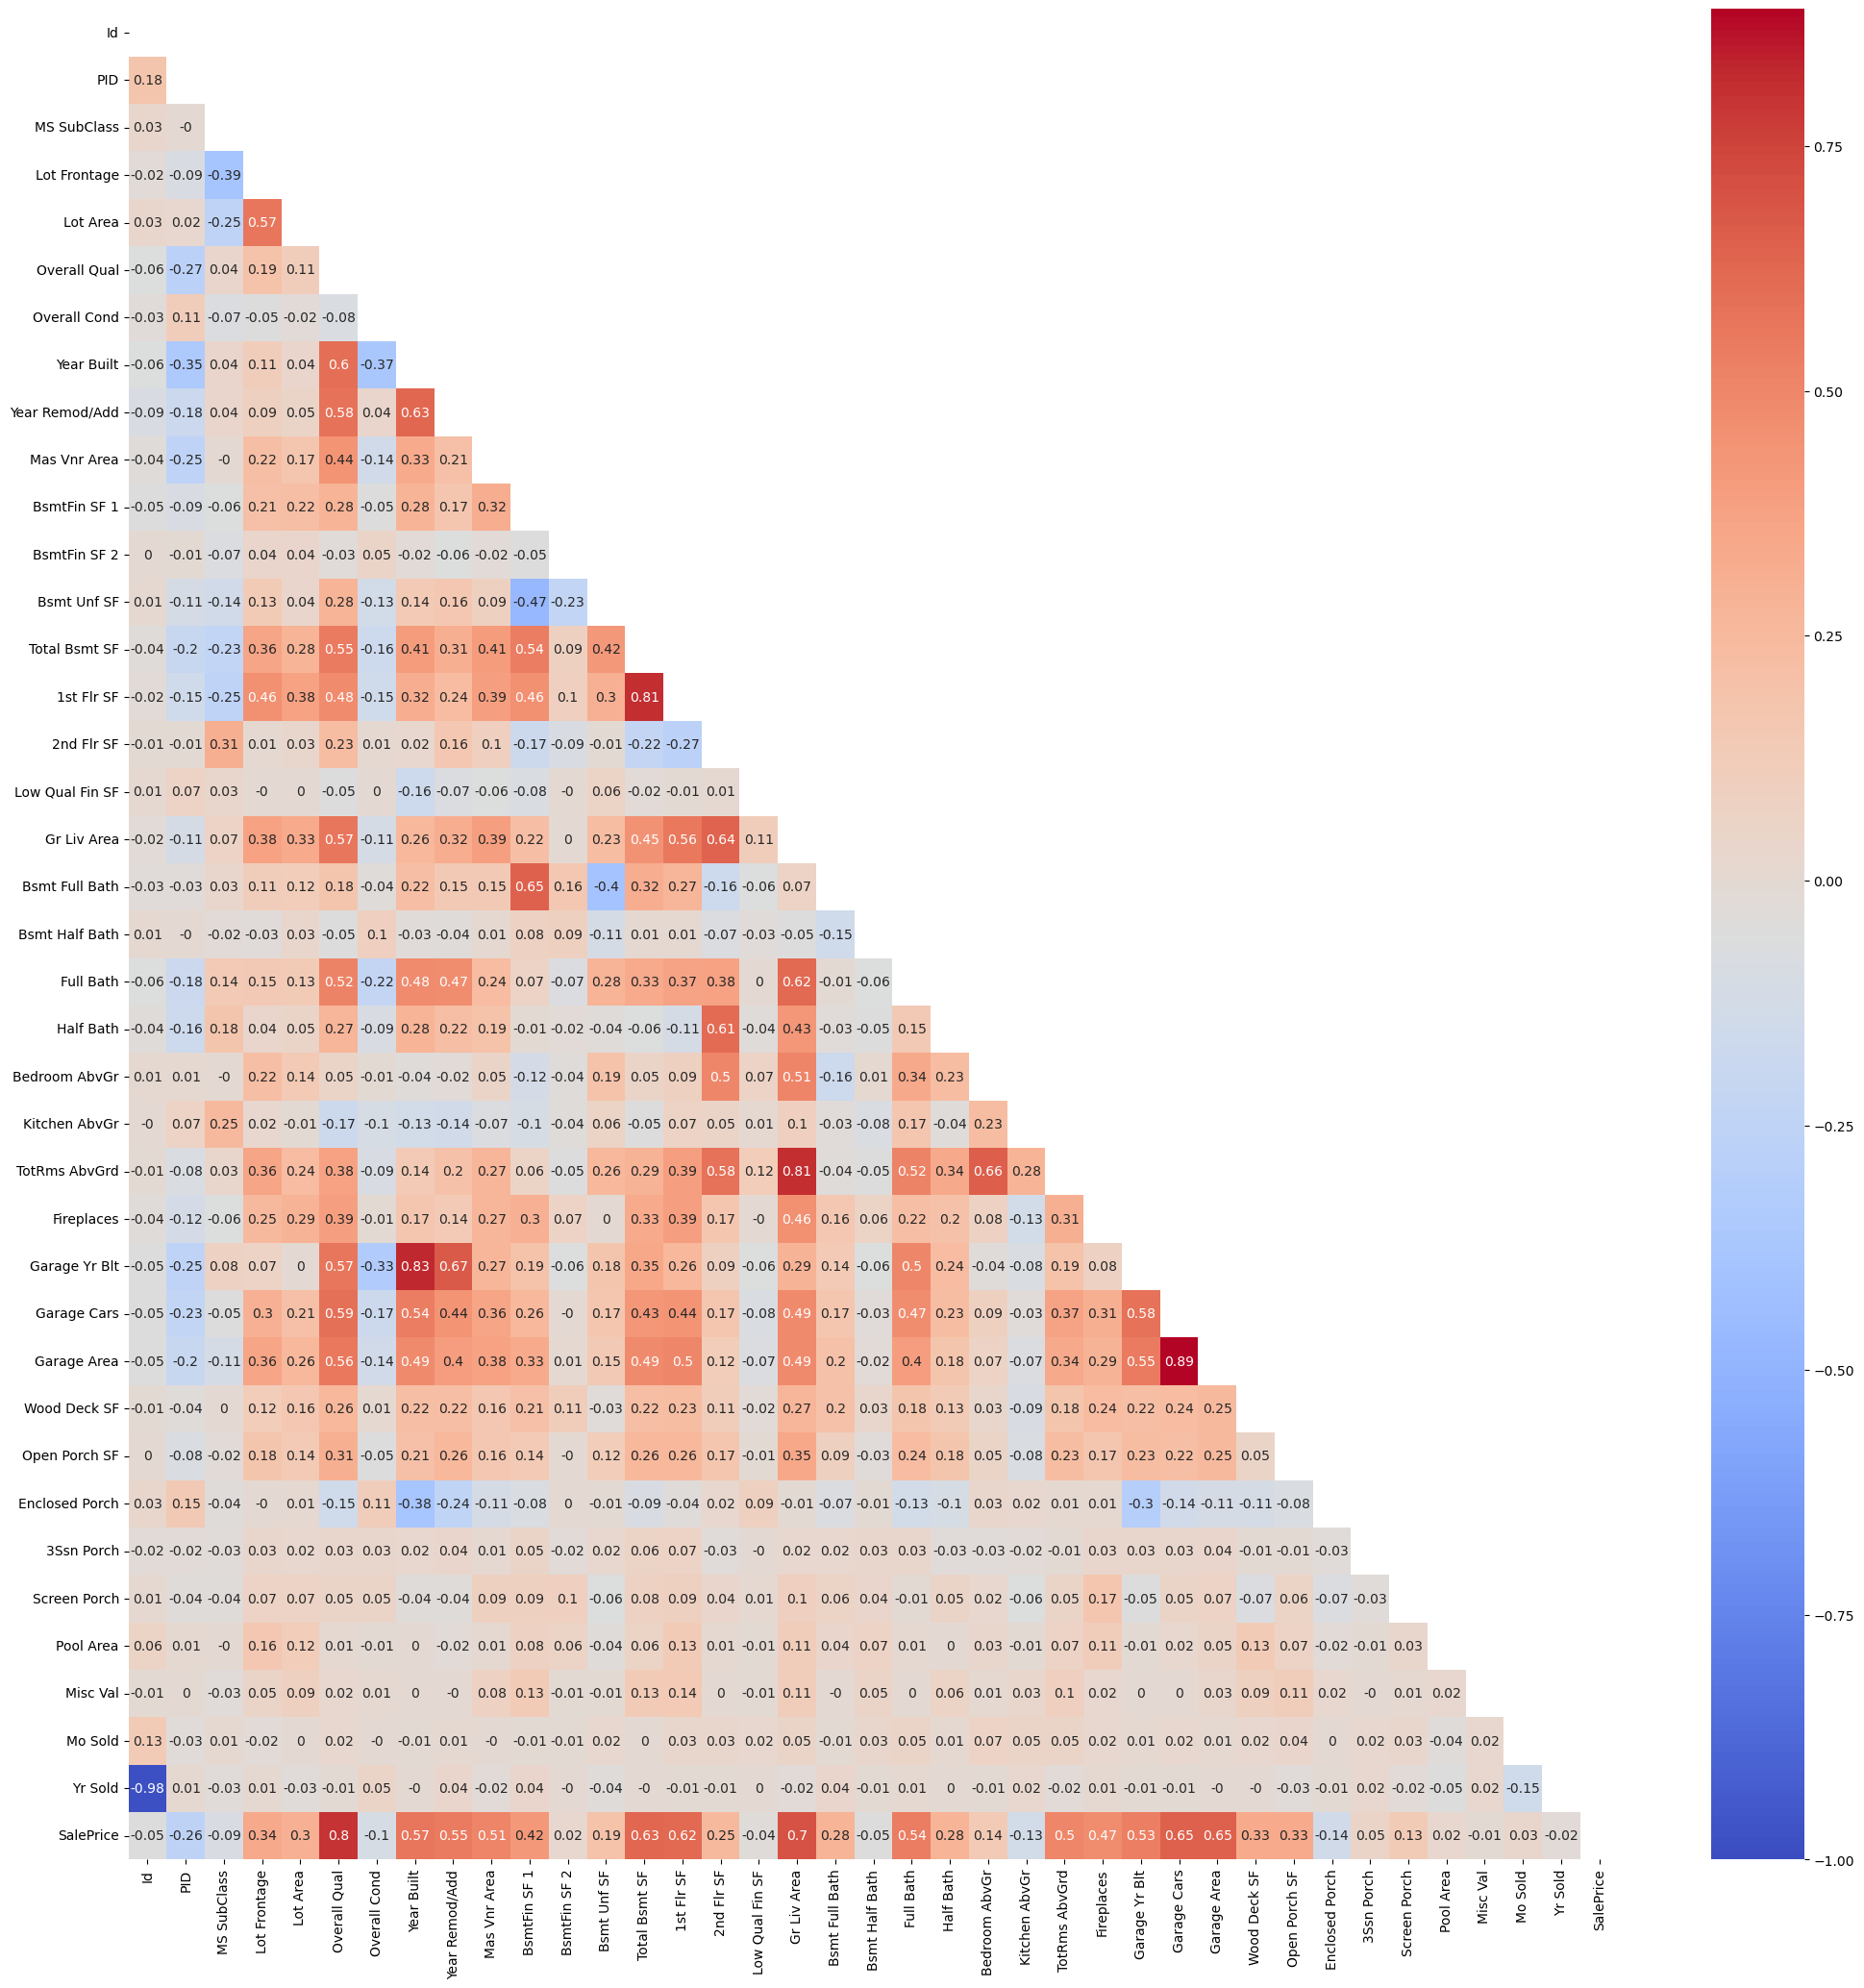

In [15]:
fig, ax = plt.subplots(figsize = (25,25))
mask = np.triu(np.ones_like(df_numerical.corr(), dtype=bool))
sns.heatmap(round(df_numerical.corr(),2), annot=True, mask = mask, cmap="coolwarm", vmin=-1);

The following variables have the strongest pairwise correlations with Sale Price. These will be the variables that will go into the very first model for submission:
* Overal Qual (0.80)
* Total Bsmt SF (0.63)
* Gr Liv Area (0.70)
* 1st Flr SF (0.62)
* Garage Cars (0.65)
* Garage Area (0.65)

## Model summary

| | **Model** | **Summary** | **R^2** | **RMSE** |
| --- | --- | --- | --- | --- |
| 1 | Simple Linear Regression | No transformations/feature engineering. Variables with multicollinearity were not included. Variables include: Overall Quality, Total Basement SF, Gr Living Area, 1st Flr SF, Garage Cars | Train: 0.78; Test: 0.82 | 33980 |
| 2 | Linear Regression | Feature engineered and scaled features. Variables include: Total sqft, Overall Condition, Overall Quality, Interaction Condition and Quality, Zone (Dummy), Neighborhood (Dummy) | Train: 0.81; Test: 0.85  | 31248 |
| 3 | Same as Model 2, but Lasso Regularization | --- | Train: 0.81; Test: 0.85 | 31043 |
| 4 | Linear Regression | Feature engineered and scaled features. Variables include: Total sqft, Overall Condition, Overall Quality, Interaction Condition and Quality, Bathrooms, Bedrooms, Month sold, Neighborhood (Dummy) | Train: 0.79; Test: 0.80 | 34671 |
| 5 | Linear Regression | Feature engineering and scaled features. Variables include: Total sqft, Lot Area, Overall Condition, Overall Quality, Interaction Condition and Quality, Bathrooms, Bedrooms, Neighborhood (Dummy), Garage Capacity, House Style (Dummy) | Train: 0.81; Test: 0.80 | 35175 |
| 6 | Lasso Regression | Feature engineering and scaled features. Variables include: Overall Condition (log), Overall Quality, Interaction Condition and Quality, Bathrooms, Bedrooms, Total sqft House (log), Total sqft Lot Area (log) | Train: 0.77; Test: 0.80 | 34435 |
| 7 | Linear Regression | Feature engineering and scaled features. Variables include: Overall Condition, Overall Quality, Interaction Condition and Quality, Bathrooms, Bedrooms, Total sqft Lot Area (log), Price per Sqft (per neighborhood) | Train: 0.82; Test: 0.84 | 30908 | 
| 8 | Lasso Regression | Feature engineering and scaled features. Variables include: Total sqft House (feature engineering), Overall Condition, Overall Quality, Interaction of Condition/Quality, Bathrooms, Bedrooms, Total sqft Lot Area (log), Price per Sqft (per neighborhood)otal sqft Lot Area (log), Price per Sqft (per neighborhood), Zone, Building Type | Train: 0.82; Test: 0.84 | 30800 | 
| 9 | Lasso Regression | Feature engineering and scaled features. Variables include: Neighborhood (dummy), Total sqft Lot Afea (log), Total sqft House (log), Bedrooms, Bathrooms, House Type (dummy), Bldg Type (dummy), Cost/Sqft (per neighborhood), Garage Capacity, Overall Quality | Train: 0.84; Test: 0.83 | 31773| 



### Models

- [Model 1]("./code/Model 1.ipynb")
- [Model 2 and 3]("./code/Model 2 and 3.ipynbModel 2 and 3.ipynb")
- [Model 4]("./code/Model 4.ipynb")
- [Model 5]("./code/Model 5.ipynb")
- [Model 6]("./code/Model 6.ipynb")
- [Model 7]("./code/Model 7.ipynb")
- [Model 8]("./code/Model 8.ipynb")
- [Model 9]("./code/Model 9.ipynb")

### Summary

This analysis intentionally focused on a select set of features, to explore how they interact with and impact Sale Price of homes. The models are all closely related, and work through various iterations of variables and feature engineering, transformation, and regression methodologies.

While none of the models did particularly well on the Kaggle Challenge, the purpose of this analysis was more to understand specific feature behavior and not to minimize RMSE overall. With this in mind, models 3 and 9 provide the most interesting findings.

Model 3:
- There is a significant difference between the train and test outcomes; indicating that the model is underfitting.
- Additionally, the model requires more optimization, in order to automate the reconciliation of datasets across all the encoded cateogrical fields included as explanatory variables.

Model 9: 
- This model had more features than Model 3, and eliminates some features that were constant across the other models (namely: Overall Condition and Interaction between Condition/Quality.)
- This feature set most closely resembles the features that consumers filter through when looking at houses via Realtor aggregator sites. My intention is to provide insights to Realtor Aggregator sites around how to optimize the consumer experience and improve their takeaways and further utilization of their sites.